# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Filter out DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Write your code here
# use the shape method to determine the the number of rows and columns of the data
df.shape

(1898, 9)

#### Observations:
- There are 1898 rows and 9 columns in the DataFrame.
- This corresponds to a possible 1898 orders.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
- There are 4 features (columns) which are int64
- There is 1 feature (column), cost_of_the_order, which is float64 
- There are 3 features (columns) which are objects, however, the feature 'rating' should be a int64 or float64, so this should be investigated further.  
- Some 'ratings' were not given, therefore the data type is labeled an object.
- The ratings which were not given either have to be discarded or the average of the rating for that cuisine or restaurant should be given.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [5]:
# Write your code here
# determine if there are missing values
print('Missing Values')
df.isna().sum()

Missing Values


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
- There are no missing vaules

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [6]:
# Write your code here
# use the describe method to determine the statistical summary of the data
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
- The statistical summary was completed for all of the quantitative variables
- The order_id and the customer_id are not relevant for the statistical summary as they are identifiers
- The food_preparation_time statistical information:
- average: 27.371970 minutes 
- minimum: 20 minutes 
- maximum: 35 minutes 

In [7]:
## how many unique restaurant_names, cuisine_types and looking at other qualitative variables
df.describe(include = 'all')

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898,1898,1898.000000,1898,1898,1898.000000,1898.000000
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1.477496e+06,171168.478398,NaN,NaN,16.498851,NaN,NaN,27.371970,24.161749
std,5.480497e+02,113698.139743,NaN,NaN,7.483812,NaN,NaN,4.632481,4.972637
min,1.476547e+06,1311.000000,NaN,NaN,4.470000,NaN,NaN,20.000000,15.000000
25%,1.477021e+06,77787.750000,NaN,NaN,12.080000,NaN,NaN,23.000000,20.000000
50%,1.477496e+06,128600.000000,NaN,NaN,14.140000,NaN,NaN,27.000000,25.000000
75%,1.477970e+06,270525.000000,NaN,NaN,22.297500,NaN,NaN,31.000000,28.000000


#### Observations:
- There are 178 unique restaurant_names, with Shake Shack (219 orders) being the top restaurant_name
- There are 14 unique cuisine_types, with American (584 orders) being the top cuisine_type
- The most orders are made on the Weekend with 1351 orders
- The rating should be an integer, however because 736 orders have a rating of 'Not given' it is an object.  And it shows that the majority of customers do not leave a rating.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Write the code here
# determine the number of orders which are not rated
df.groupby('rating').count()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,food_preparation_time,delivery_time
rating,,,,,,,,
3,188,188,188,188,188,188,188,188
4,386,386,386,386,386,386,386,386
5,588,588,588,588,588,588,588,588
Not given,736,736,736,736,736,736,736,736


#### Observations:
- There are 736 orders which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

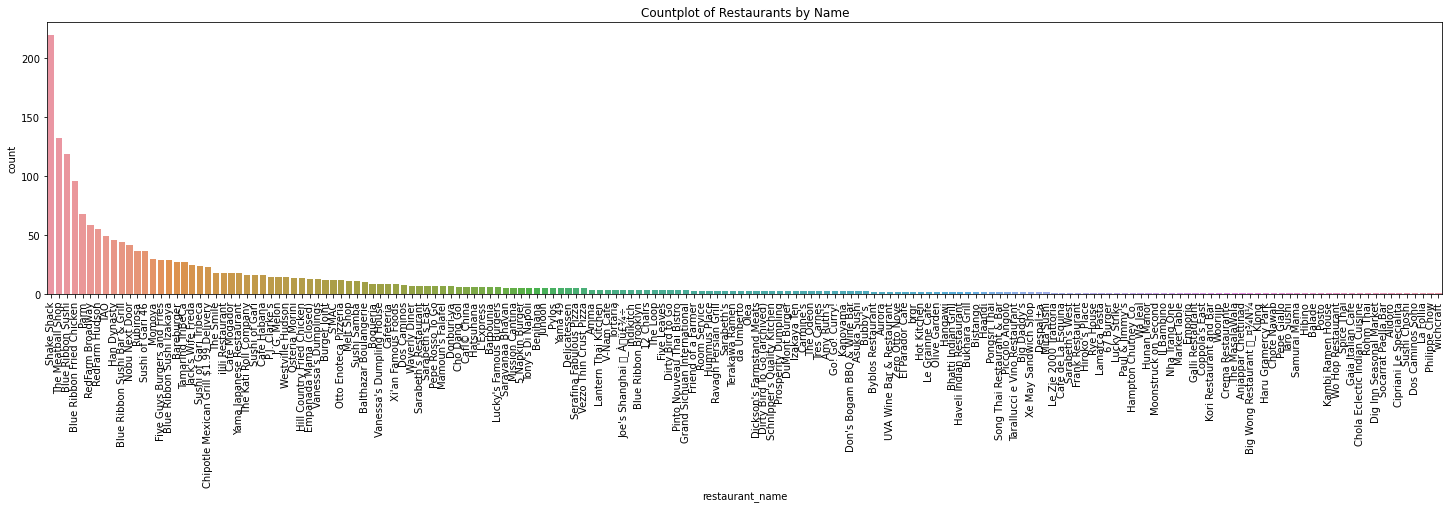

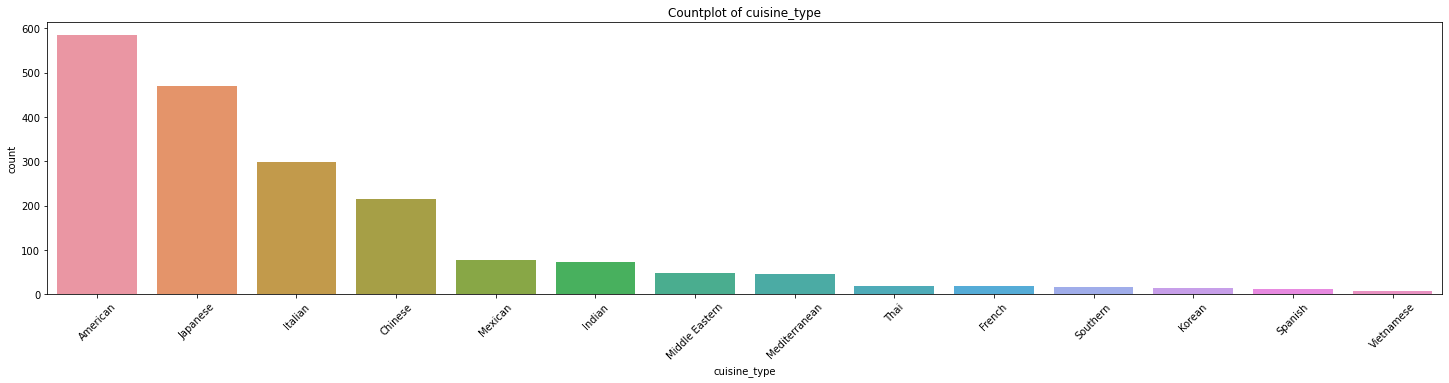

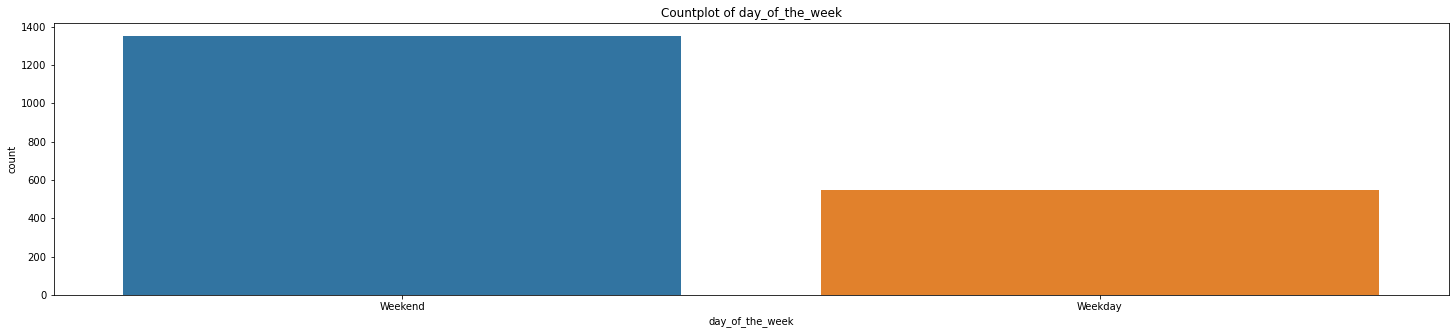

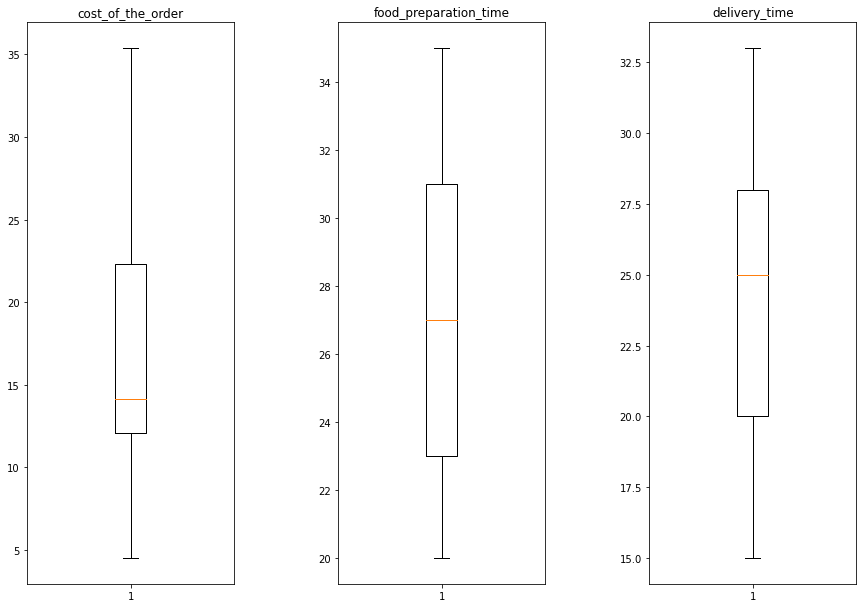

<Figure size 1080x360 with 0 Axes>

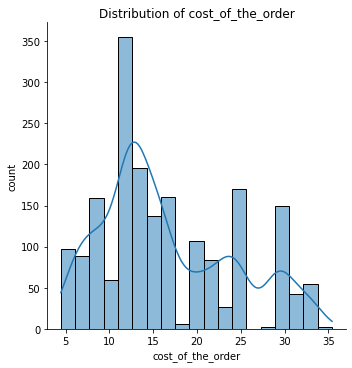

<Figure size 1080x360 with 0 Axes>

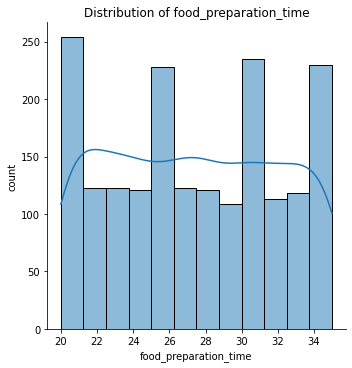

<Figure size 1080x360 with 0 Axes>

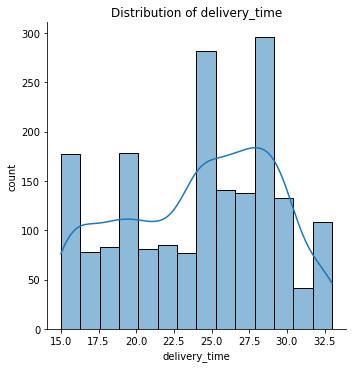

In [9]:
# Write the code here
#Countplots for the qualitative variables
# displaying the 'restaurant_name' using a countplot
plt.figure(figsize = (25, 5))
sns.countplot(df.restaurant_name, order = df.restaurant_name.value_counts().index)

#add a title to the countplot
plt.title('Countplot of Restaurants by Name')

#rotate the xtick labels for readability
plt.xticks(rotation = 90)

# displaying the 'cuisine_type' using a countplot
plt.figure(figsize = (25, 5))
sns.countplot(df.cuisine_type, order = df.cuisine_type.value_counts().index)

#add a title to the countplot
plt.title('Countplot of cuisine_type')

#rotate the xtick labels for readability
plt.xticks(rotation = 45)

# displaying the 'day_of_the_week' using a countplot
plt.figure(figsize = (25, 5))
sns.countplot(df.day_of_the_week, order = df.day_of_the_week.value_counts().index)

#add a title to the countplot
plt.title('Countplot of day_of_the_week')

#set of boxplots of the quantitative variables
fig, axs = plt.subplots(1, 3)
#Boxplot for the cost_of_the_order
axs[0].boxplot(df['cost_of_the_order'])
axs[0].set_title('cost_of_the_order')

#Boxplot for the food_preparation_time
axs[1].boxplot(df['food_preparation_time'])
axs[1].set_title('food_preparation_time')

#Boxplot for the delivery_time
axs[2].boxplot(df['delivery_time'])
axs[2].set_title('delivery_time')

#adjust spacing for readability
fig.subplots_adjust(left=0.08, right=2, bottom=0.05, top=2,
                    hspace=0.5, wspace=0.5)

# set of distribution plots for the quantitative variables
# distribution plot for the cost_of_the_order
plt.figure(figsize = (15, 5))
sns.displot(df.cost_of_the_order, kde=True)
plt.title('Distribution of cost_of_the_order')
plt.xlabel('cost_of_the_order')
plt.ylabel('count')
          
# distribution plot for the food_preparation_time
plt.figure(figsize = (15, 5))
sns.displot(df.food_preparation_time, kde=True)
plt.title('Distribution of food_preparation_time')
plt.xlabel('food_preparation_time')
plt.ylabel('count')
          
# distribution plot for the delivery_time
plt.figure(figsize = (15, 5))
sns.displot(df.delivery_time, kde=True)
plt.title('Distribution of delivery_time')
plt.xlabel('delivery_time')
plt.ylabel('count')

#display plot
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [10]:
# Write the code here
#list the top 5 restaurants by the number of orders received
num_orders_per_restaurant = df.groupby('restaurant_name').count()
top_5_restaurants = num_orders_per_restaurant.sort_values(by = ['order_id'], ascending = False).head(5)
top_5_restaurants

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,219,219,219,219,219,219,219,219
The Meatball Shop,132,132,132,132,132,132,132,132
Blue Ribbon Sushi,119,119,119,119,119,119,119,119
Blue Ribbon Fried Chicken,96,96,96,96,96,96,96,96
Parm,68,68,68,68,68,68,68,68


#### Observations:
- The top 5 restaurants, ranked by the number of orders received are:
- Shake Shack - 219 orders
- The Meatball Shop - 132 orders
- Blue Ribbon Sushi - 119 orders
- Blue Ribbon Fried Chicken - 96 orders
- Parm - 68 orders


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [11]:
# Write the code here
# find the most popular cuisines on the weekends
cuisine_by_day_of_week = pd.crosstab(df['cuisine_type'],df['day_of_the_week'])
popular_cuisine_weekend = cuisine_by_day_of_week.sort_values(by = ['Weekend'] , ascending = False)
popular_cuisine_weekend

day_of_the_week,Weekday,Weekend
cuisine_type,,
American,169,415
Japanese,135,335
Italian,91,207
Chinese,52,163
Mexican,24,53
Indian,24,49
Mediterranean,14,32
Middle Eastern,17,32
Thai,4,15


#### Observations:
- The most popular, top 5, cuisines on the weekend are:
- American - 415 orders
- Japanese - 335 orders
- Italian - 207 orders
- Chinese - 163 orders
- Mexican - 53 orders


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [12]:
# Write the code here
#find the number of orders greater than 20usd
greater_than_20usd = df['cost_of_the_order'] > 20
num_greater_than_20usd = greater_than_20usd.sum()

# to find the percentage of orders greater than 20usd, you will take the (number of orders greater than 20usd / total number of orders)*100
total_orders = df['cost_of_the_order'].count()

percent_orders_greater_20usd = (num_greater_than_20usd/total_orders)*100

print('The number of orders greater than 20usd is:', num_greater_than_20usd)
print('The number of total number of orders:', total_orders)
print('The percent of orders greater than 20usd is:', percent_orders_greater_20usd)

The number of orders greater than 20usd is: 555
The number of total number of orders: 1898
The percent of orders greater than 20usd is: 29.24130663856691


#### Observations:
- The percent of orders that cost more than 20 USD is 29.24%

### **Question 10**: What is the mean order delivery time? [1 mark]

In [13]:
# Write the code here
# find the mean order delivery time
mean_delivery_time = df['delivery_time'].mean()

print ('The mean order delivery time is:', mean_delivery_time)

The mean order delivery time is: 24.161749209694417


#### Observations:
- The mean order delivery time is approximately 24 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [14]:
# Write the code here
#list the top 3 most frequent customers
freq_customers = df.groupby('customer_id').count()
top_3_customers = freq_customers.sort_values(by = ['order_id'], ascending = False).head(3)
top_3_customers

,order_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
customer_id,,,,,,,,
52832,13,13,13,13,13,13,13,13
47440,10,10,10,10,10,10,10,10
83287,9,9,9,9,9,9,9,9


#### Observations:
- The three most frequent customers are:

| Customer_id | number of orders | 
----------------------------------
|   52832     |        13        | \
|   47440     |        10        | \
|   83287     |         9        | 




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


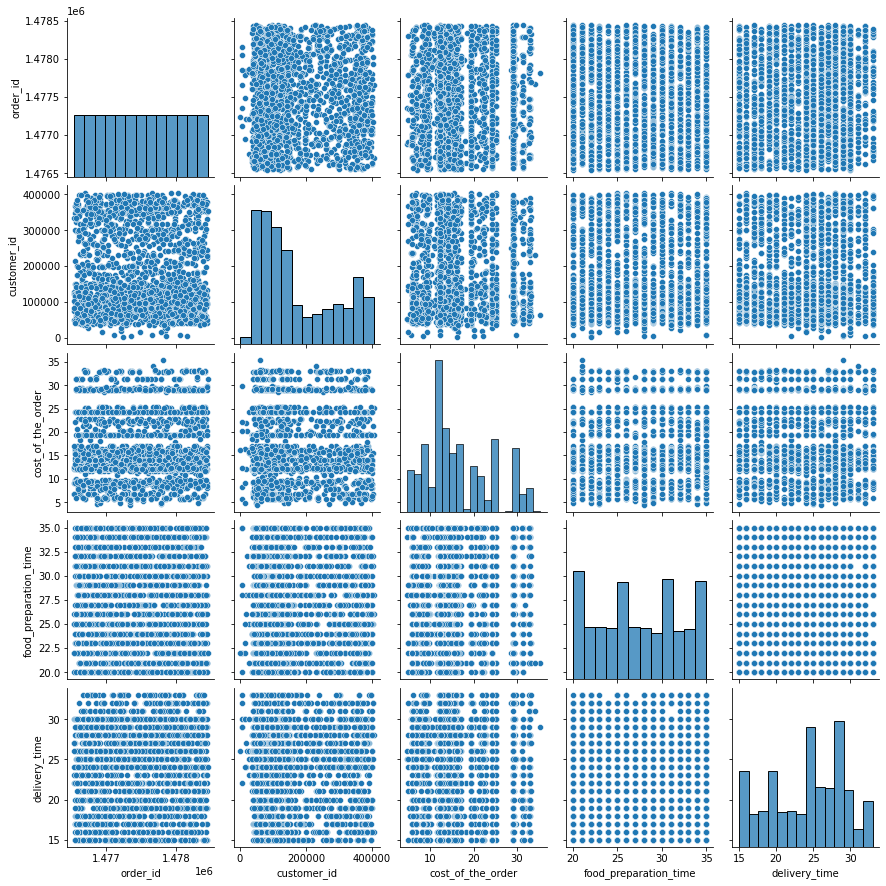

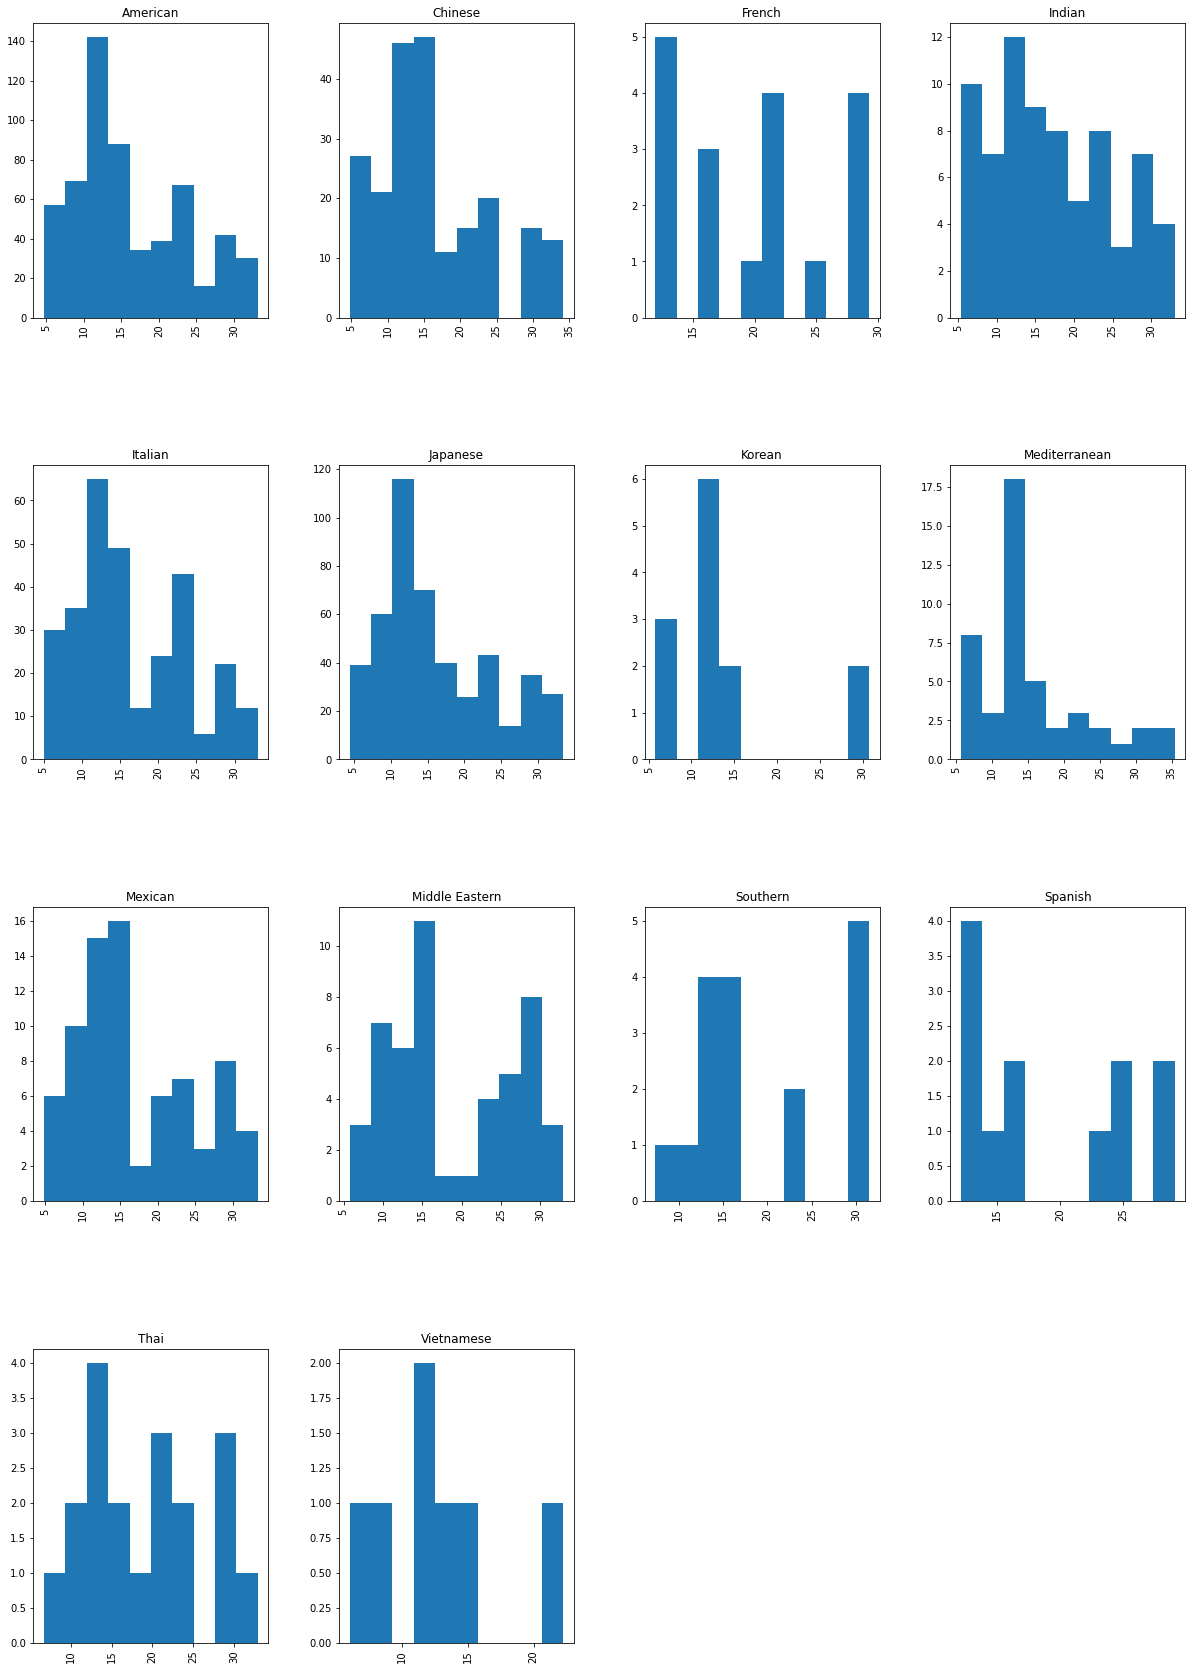

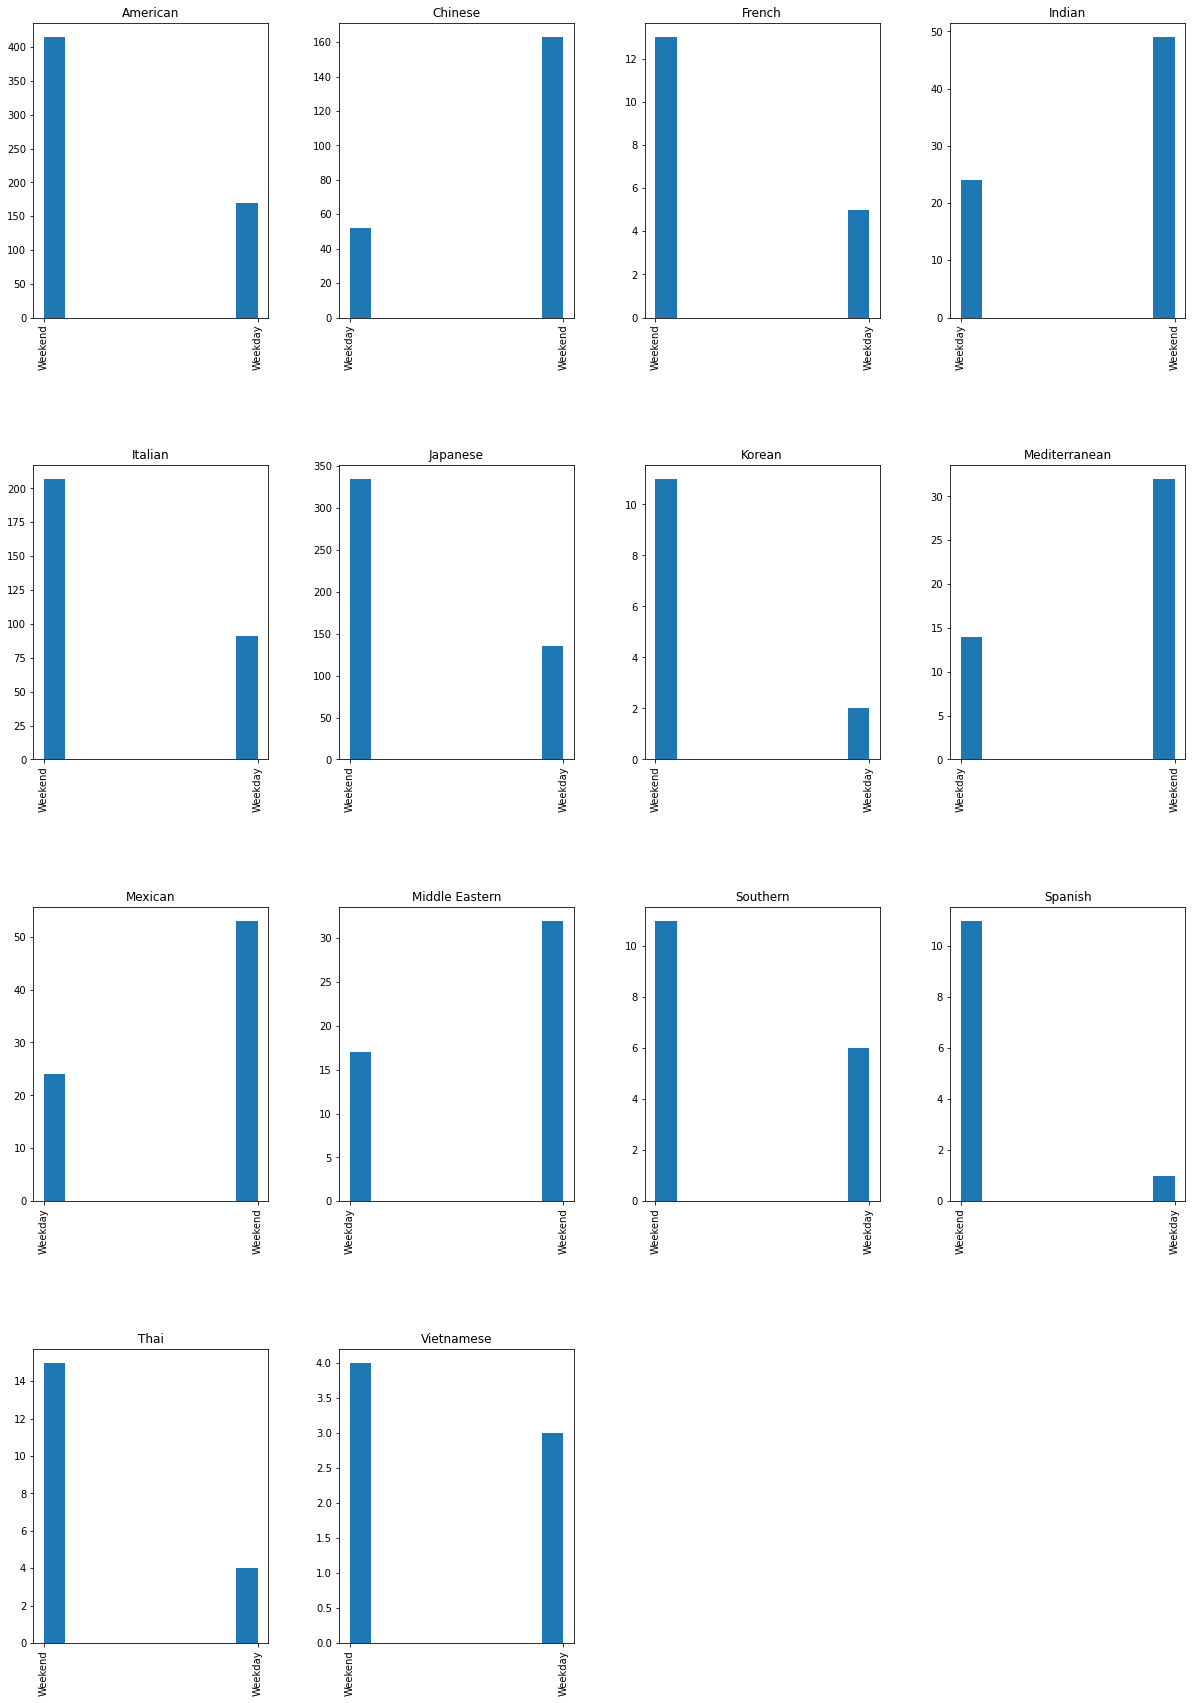

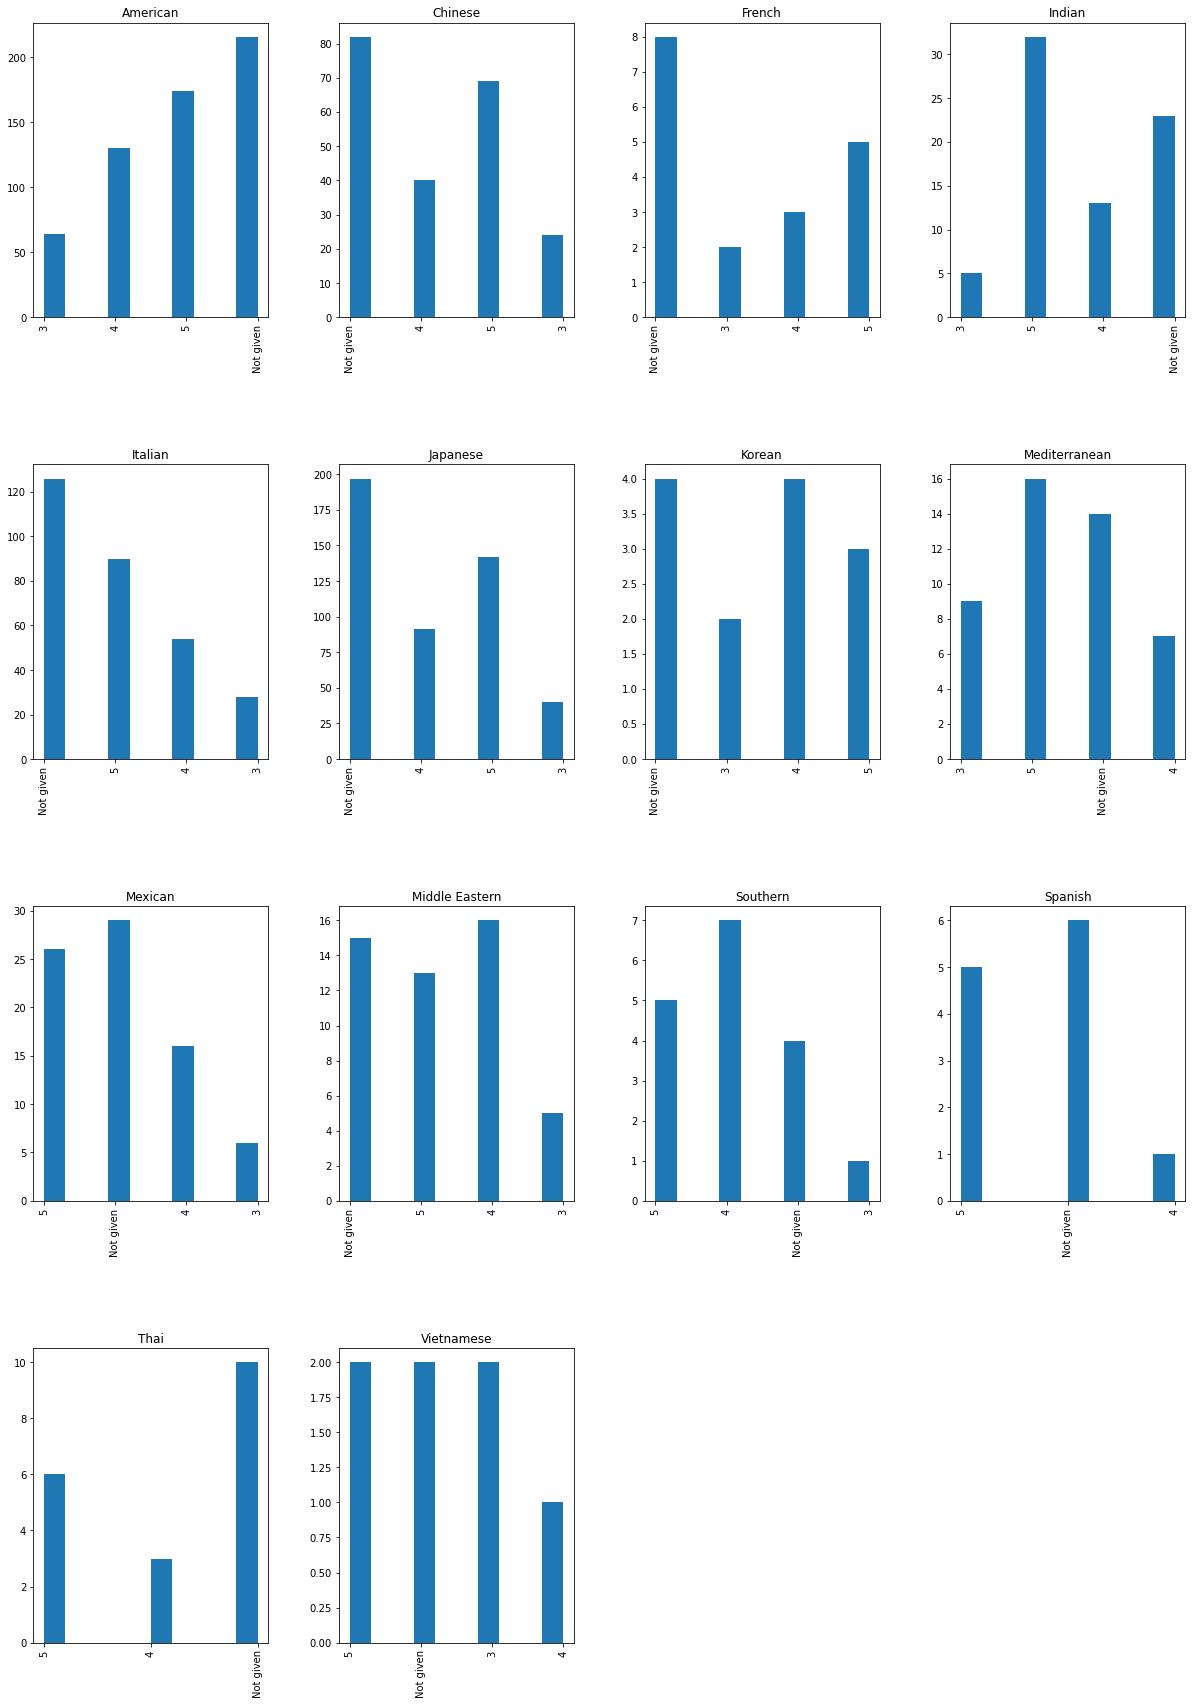

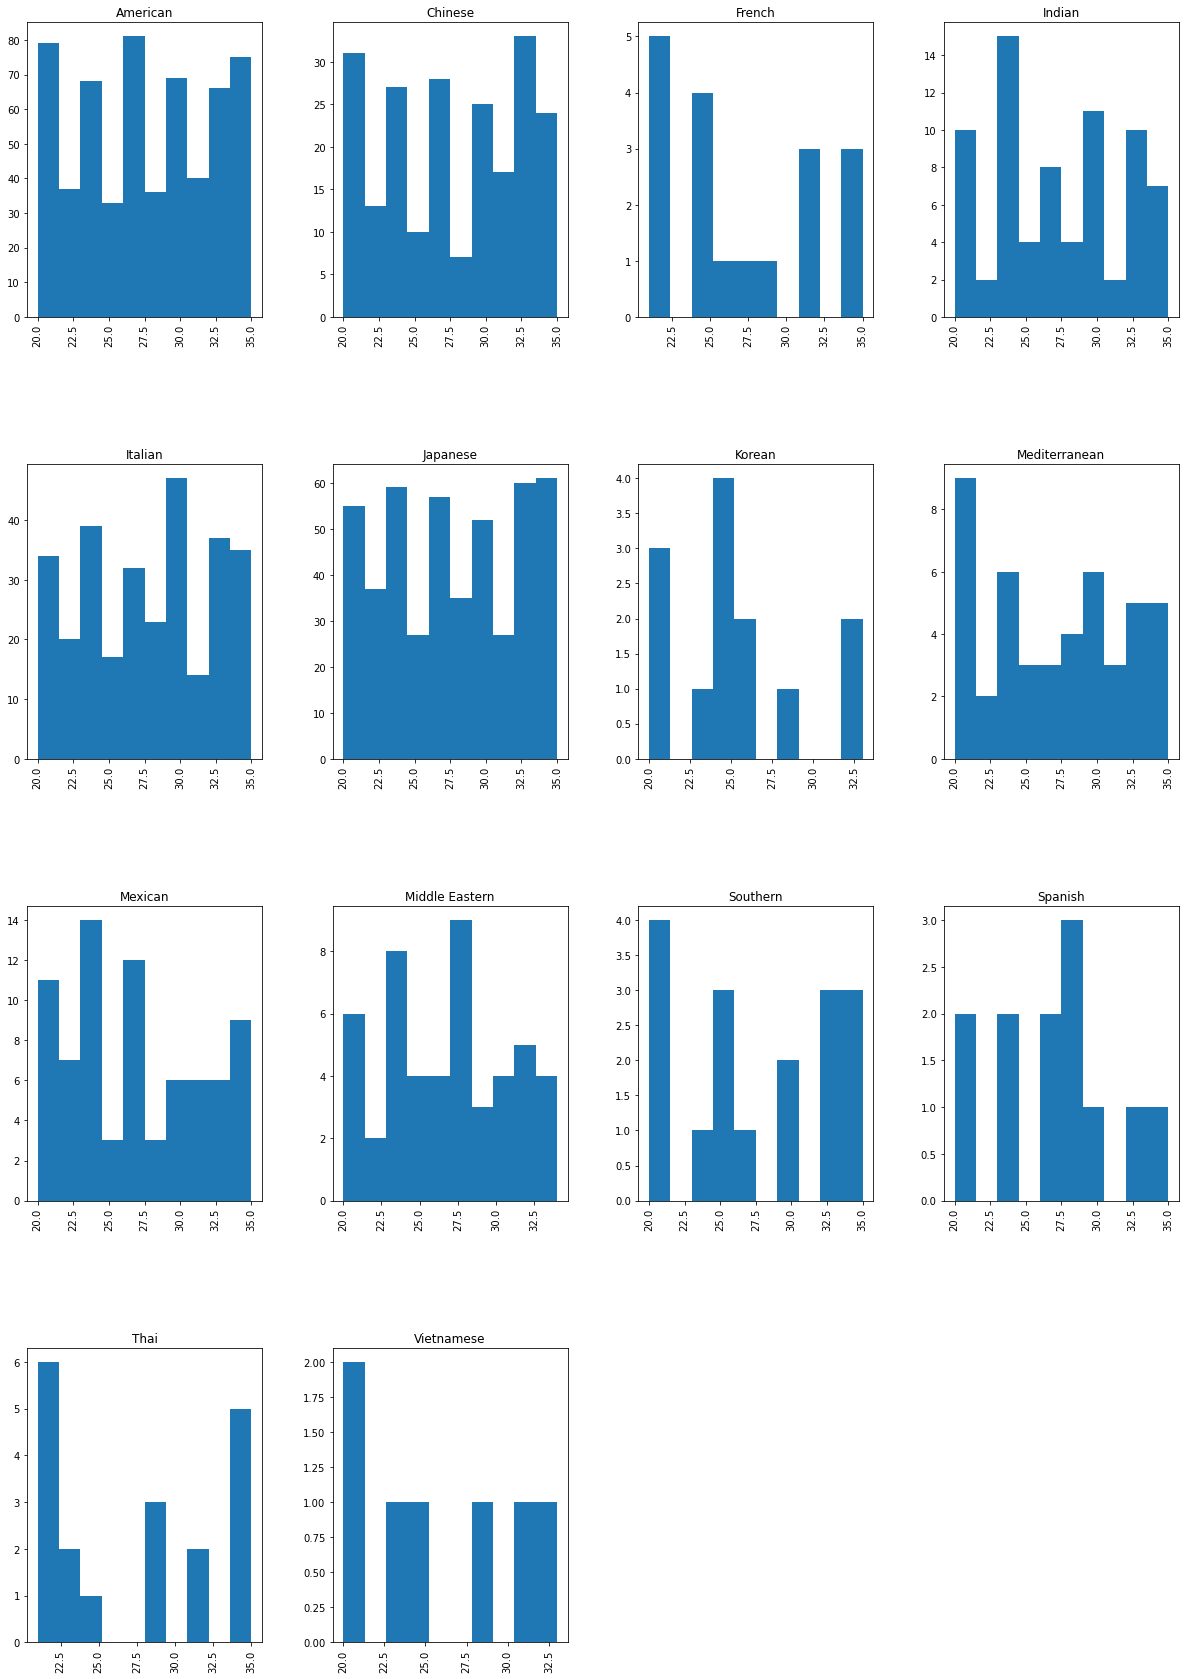

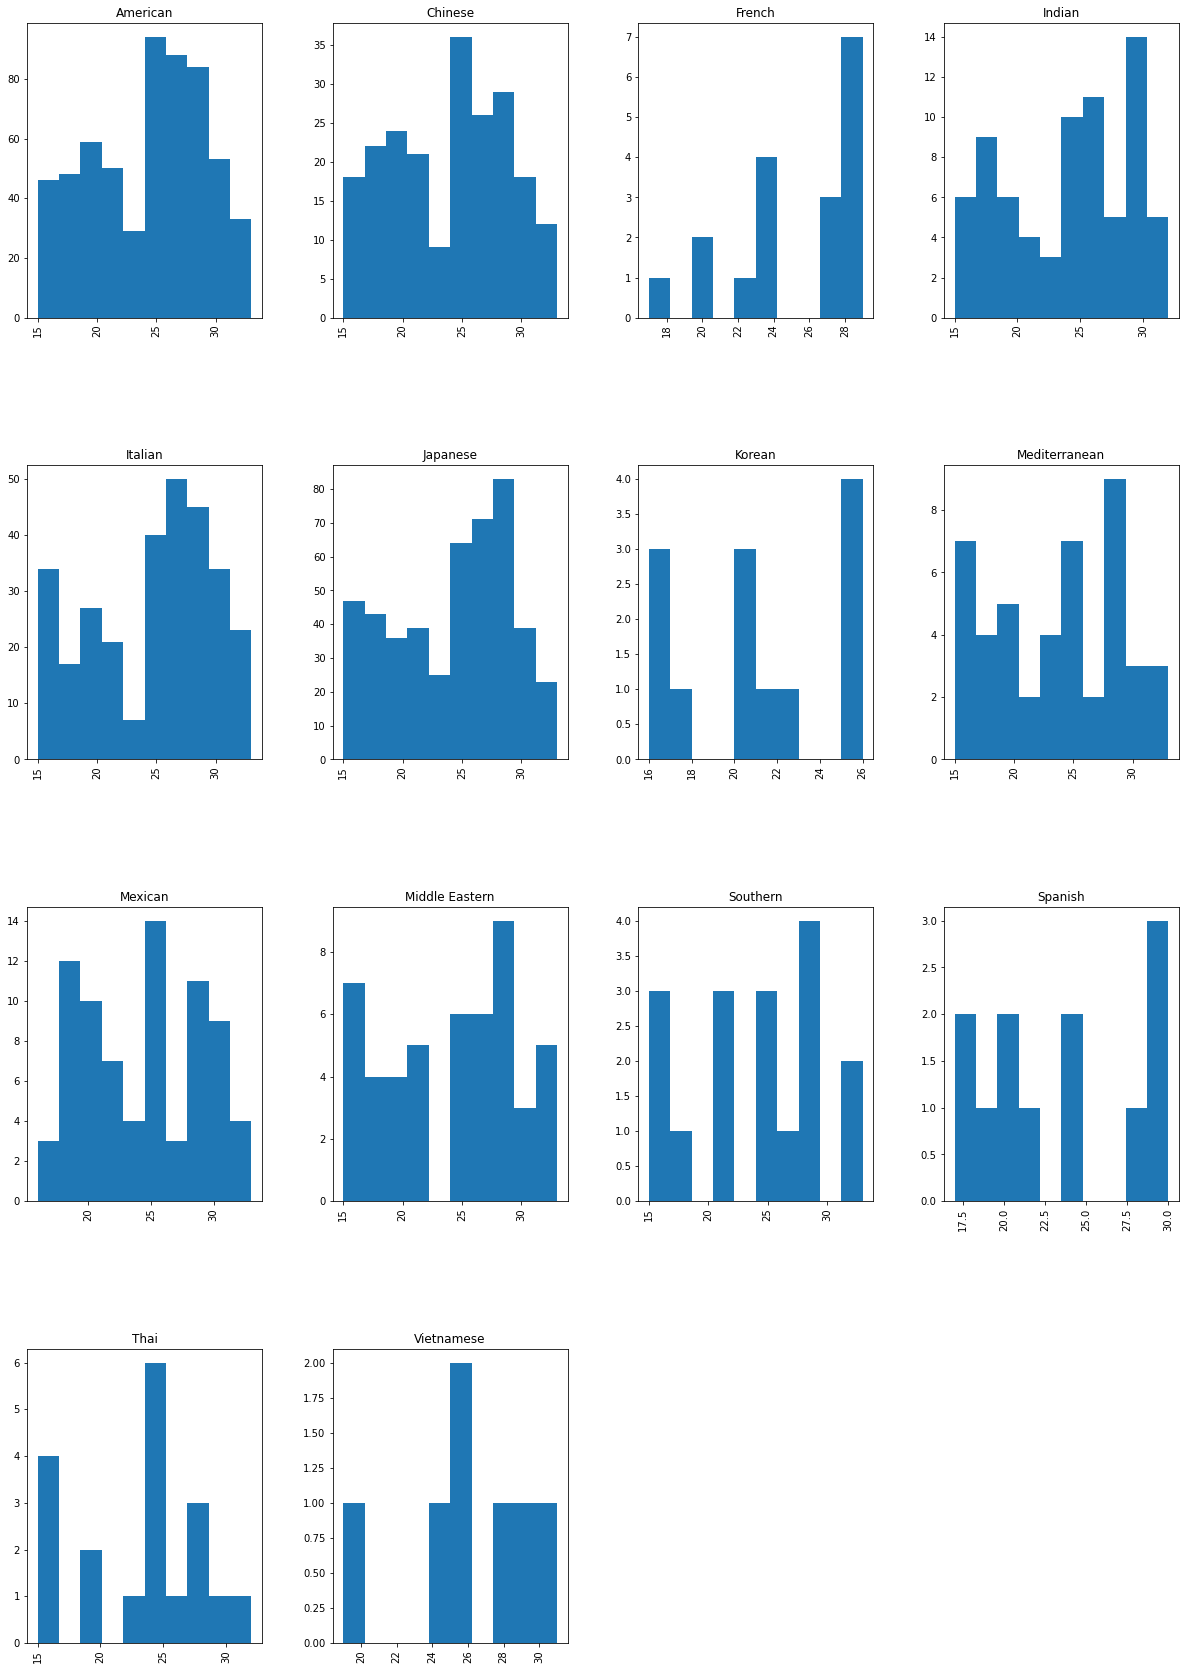

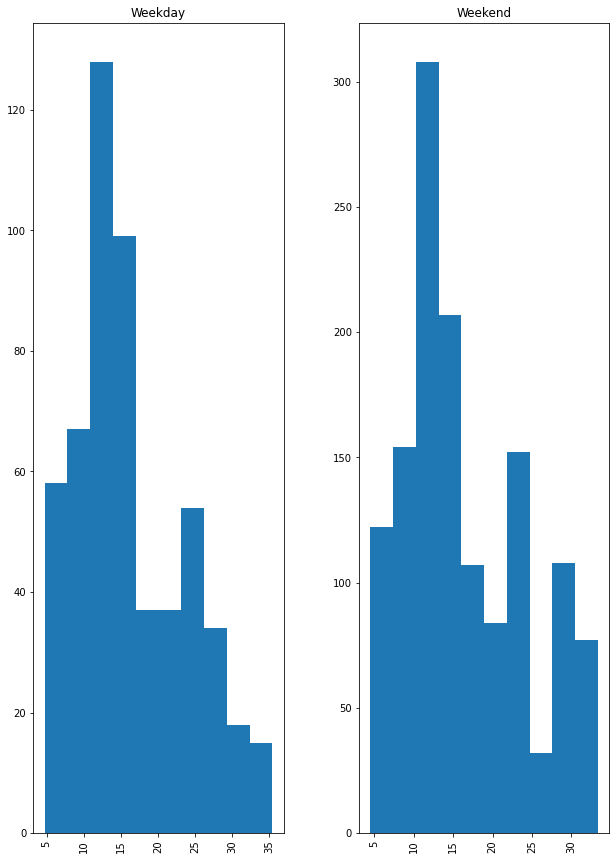

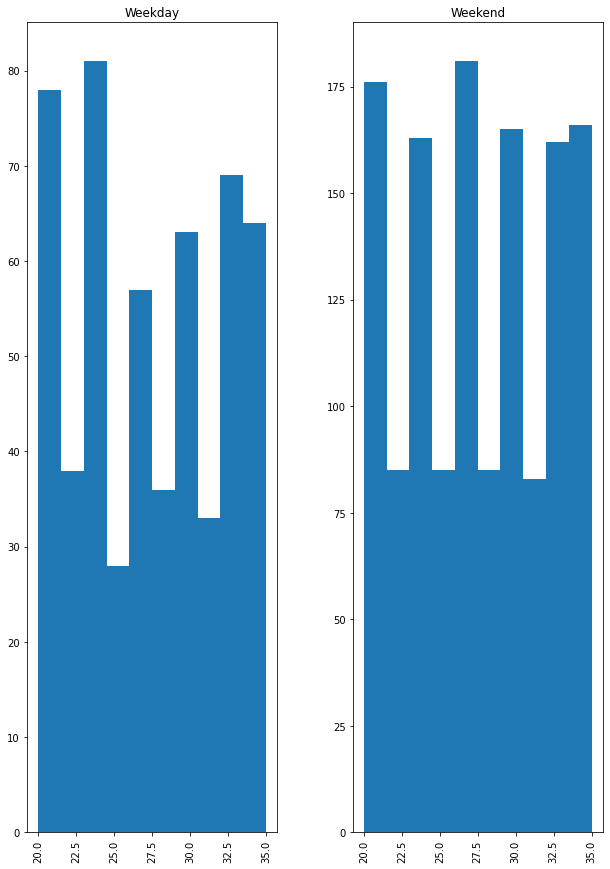

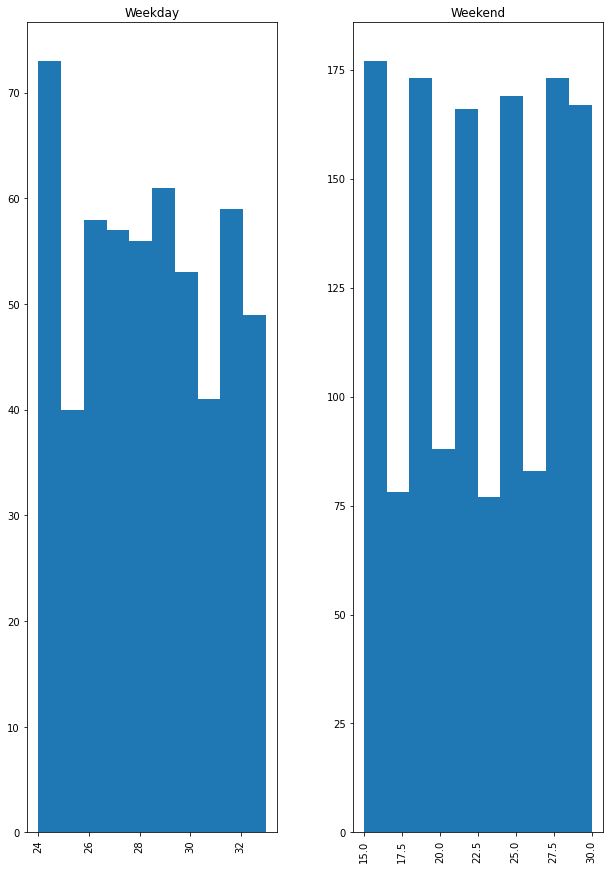

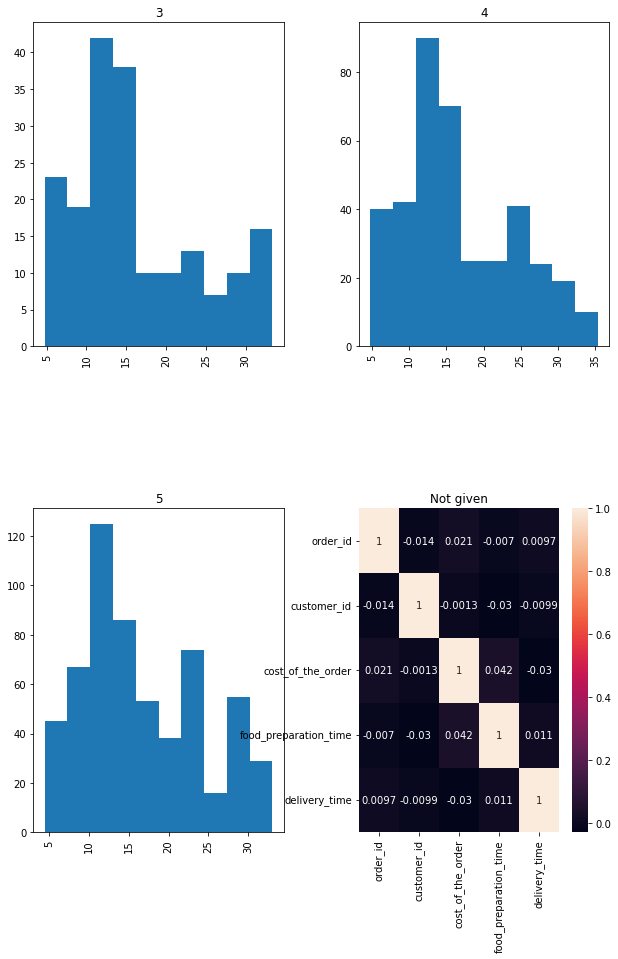

In [15]:
# Write the code here
# create a pair plot to see if there are any relationships 
sns.pairplot(df)


# identify relationships between the cuisine type and the cost of the order
df.hist(by='cuisine_type',column = 'cost_of_the_order', figsize=(20,30))

# identify relationships between the cuisine type and the day_of_the_week
df.hist(by='cuisine_type',column = 'day_of_the_week', figsize=(20,30))

# identify relationships between the cuisine type and the rating
df.hist(by='cuisine_type',column = 'rating', figsize=(20,30))

# identify relationships between the cuisine type and the food_preparation_time
df.hist(by='cuisine_type',column = 'food_preparation_time', figsize=(20,30))

# identify relationships between the cuisine type and the delivery_time
df.hist(by='cuisine_type',column = 'delivery_time', figsize=(20,30))

# identify relationships between the cost_of_the_order and the day_of_the_week
df.hist(by='day_of_the_week',column = 'cost_of_the_order', figsize=(10,15))

# identify relationships between the food_preparation_time and the day_of_the_week
df.hist(by='day_of_the_week',column = 'food_preparation_time', figsize=(10,15))

# identify relationships between the food_preparation_time and the day_of_the_week
df.hist(by='day_of_the_week',column = 'delivery_time', figsize=(10,15))

# identify relationships between the cost_of_the_order and the rating
df.hist(by='rating',column = 'cost_of_the_order', figsize=(10,15))



# find the correlations between the features
corr = df.corr()
corr

# create the heatmap of the correlation between the features
sns.heatmap(corr, annot=True)

plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [16]:
# Write the code here
# create a dataframe with the specific ratings for each restaurant 
all_ratings_by_restaurant = pd.crosstab(df['restaurant_name'],df['rating'] )

# need to drop the 'not given' responses in order to sum the total ratings for each restaurant
ratings_by_restaurant = all_ratings_by_restaurant.drop('Not given', axis=1)

# find the total number of reveiws each restaurant received
total_reviews = ratings_by_restaurant['total_reviews'] = ratings_by_restaurant.sum(axis=1)

# find the average rating for each restaurant
column = list(ratings_by_restaurant.columns)
temp_lst = ['3', '4', '5']

for column in temp_lst:
    ratings_by_restaurant['average_rating'] = (ratings_by_restaurant['3'] * 3 + ratings_by_restaurant['4'] * 4 + ratings_by_restaurant['5'] * 5)/ratings_by_restaurant['total_reviews']
    
# sort the total_reviews in descending order
ratings_by_restaurant.sort_values(by = ['total_reviews'], ascending = False)

temp_lst2 = ['total_reviews', 'average_rating']

# use a loop to go through all of the objects to determine if the restaurant has 50 or more reviews and an average of greater than 4.0
for column in temp_lst2:
    ratings_by_restaurant['More_50'] = ratings_by_restaurant['total_reviews'] >= 50
    ratings_by_restaurant['More_4'] = ratings_by_restaurant['average_rating'] >= 4

# determine which restaurants meet the criteria 
promotion_restaurants = ratings_by_restaurant[(ratings_by_restaurant['More_50'] == True) & (ratings_by_restaurant['More_4'] == True)]

# display the restaurants which meet the criteria
promotion_restaurants

rating,3,4,5,total_reviews,average_rating,More_50,More_4
restaurant_name,,,,,,,
Blue Ribbon Fried Chicken,11,21,32,64,4.328125,True,True
Blue Ribbon Sushi,16,25,32,73,4.219178,True,True
Shake Shack,23,50,60,133,4.278195,True,True
The Meatball Shop,10,21,53,84,4.511905,True,True


In [17]:
ratings_by_restaurant.sort_values(by = ['total_reviews'], ascending = False)

rating,3,4,5,total_reviews,average_rating,More_50,More_4
restaurant_name,,,,,,,
Shake Shack,23,50,60,133,4.278195,True,True
The Meatball Shop,10,21,53,84,4.511905,True,True
Blue Ribbon Sushi,16,25,32,73,4.219178,True,True
Blue Ribbon Fried Chicken,11,21,32,64,4.328125,True,True
RedFarm Broadway,8,15,18,41,4.243902,False,True
...,...,...,...,...,...,...,...
Market Table,0,0,0,0,NaN,False,False
Paul & Jimmy's,0,0,0,0,NaN,False,False
Room Service,0,0,0,0,NaN,False,False


#### Observations:
- There are only 4 restaurants that meet the criteria for the promotional offer.
- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- Shake Shack
- The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [18]:
# Write the code here
# find the orders that are over 5 usd and over 20 usd
# create a column 'charge' with the cost *0.15 or cost*0.25 respectively%

#create a column 'charge' set to zero
df['charge'] = 0

# find the objects between 5 and 20 and multiply by 0.15 and find objects greater than 20 and multiply by 0.25
for index, row in df.iterrows():
    cost = row['cost_of_the_order']
    if cost > 5 and cost <= 20:
        df.at[index, 'charge'] = cost * 0.15
    elif cost > 20:
        df.at[index, 'charge'] = cost * 0.25

# find the total revenue by summing the 'charge' column
net_revenue = df['charge'].sum()


print('The net revenue generated by the company across all orders is:', net_revenue)


The net revenue generated by the company across all orders is: 6166.303


#### Observations:
- The total net revenue by the company across all orders is: 6166.31

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [19]:
# Write the code here
# find the number of orders which require more than 60 minutes to deliver the food

delivery_time_from_order = df['food_preparation_time'] + df['delivery_time']
delivery_time_from_order.describe()

df['over_60min'] = (delivery_time_from_order > 60).astype(int)

df['over_60min'].sum()

percent_delivery_over_60 = (df['over_60min'].sum() / df['order_id'].count()) * 100

print('The percent of orders that take more than 60 minutes to get delivered from the time the order is placed is:', percent_delivery_over_60)


The percent of orders that take more than 60 minutes to get delivered from the time the order is placed is: 10.537407797681771


#### Observations:
- About 10.5% of the orders take over 60 minutes to get delivered from the time the order is placed

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [20]:
# Write the code here
# find the mean delivery time grouped by the day_of_the_week 
by_day_of_the_week = df.groupby('day_of_the_week').mean()

mean_delivery_by_day_of_the_week = by_day_of_the_week['delivery_time']
#delivery_time_by_day_of_week = pd.crosstab(df.groupby('day_of_the_week'), df['delivery_time'])

#delivery_time_by_day_of_week = pd.crosstab(df['day_of_the_week'], df['delivery_time'])

by_day_of_the_week 
mean_delivery_by_day_of_the_week

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:

- The weekend has a shorter delivery time.  


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
There were 1898 orders analyzed.  

There are 178 unique restaurants.
Shake Shack was the restaurant with the most orders, 219.

There are 14 unique cuisine types.
American was the most ordered cuisine with 584 orders.

#### Costs of the Orders
The costs of the orders range from 4.47 USD to 35.41 USD with the mean cost being $16.50.
The cost of the food has a positively skewed distribution. 
Only approximately 29.24% (555 orders) of the orders cost over 20 USD.

The days of the week were separated into two variables, weekday and weekend. 
71% (1351/1898) of the orders occur on the weekend.

#### Reviews
Food hub asks customers to review the food and 4 unique reviews were offered: 3, 4, 5, Not given.
736 (38.7%) of the customers chose not to review their received order.  
This was the most common response.

- rating 3 - 188
- rating 4 - 386
- rating 5 - 588
- Not Given - 736


#### Food Preparation and Delivery
The food_preparation_time ranged 20 minutes to 35 minutes with the mean being 27.37 minutes.
The food preparation time was uniformly distributed.
The food delivery time ranged from 15 minutes to 33 minutes with the mean being 24.16 minutes.
The delivery time was negatively skewed.
The mean deliver time 
- Weekday    28.340037
- Weekend    22.470022

The summary statistics for the delivery time for orders including food preparation are:
- count    1898.000000
- mean       51.533720
- std         6.833603
- min        35.000000
- 25%        47.000000
- 50%        52.000000
- 75%        56.000000
- max        68.000000

Only '10%' of the orders placed take over 60 minutes for delivery, from the time it was placed.

#### Relationships
There are no correlations identified between the quantitative variables.

##### The Cuisine and x
The relationship shown by:
The cuisine and cost of the order is positively skewed for all except Southern
The cuisine and the day of the week shows the weekend is the most popular for all
The cuisine and the ratings given shows Not Given was the highest received for 8 cuisines, however for Indian, 5 was the highest, Korean was a equal between 4 and Not given, Mediterranean has more 5, Middle Eastern and Southern has 4 as the most given review and Vietnamese had a tie between 3, 5 and Not given. 

For the restaurants which received reviews the following four received the most reviews
- Shake Shack - 133 reviews average rating - 4.28
- The Meatball Shop - 84 reviews, average rating - 4.51
- Blue Ribbon Fried Chicken - 73 reviews, average rating - 4.32
- Blue Ribbon Sushi - 64 reviews, average rating - 4.22

The top 5 restaurants ordered from are:
- Shake Shack - 219 orders
- The Meatball Shop - 132 orders
- Blue Ribbon Sushi - 119 orders
- Blue Ribbon Fried Chicken - 96 orders
- Parm - 68 orders

The most popular, top 5, cuisines on the weekend are:
- American - 415 orders
- Japanese - 335 orders
- Italian - 207 orders
- Chinese - 163 orders
- Mexican - 53 orders

#### Net Revenue
Almost all orders are charged a fee: '15%' for orders over '5 USD' and '25%' for orders over '20 USD'.
The company received a net revenue of $6166.31 across all orders.  

### Recommendations:

*  As the mean averages are 16.50 USD, look at how the charges are broken down.  
It may be benficial to add a 20% for orders that over $10 USD.

* To gain more reviews from the customers add a 5 USD off coupon on their next order for them leaving a review. This would increase customer engagement and encourage return business.

* The food prep and delivery had reasonable time frames with 75% taking 56 minutes or less.  
Foodhub could have delivery drivers closer to the restaurants which receive the most orders.  

---